In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import metrics

In [4]:
df = pd.read_csv('/kaggle/input/salary/Salary.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

We have two variables in this data. We will predict the salary basis the years of experience

<AxesSubplot: >

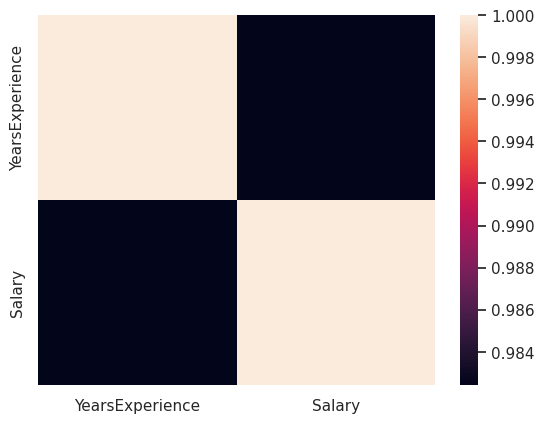

In [7]:
sns.heatmap(df.corr())

Higher the correlation between the variables higher the chances of the model not performing well with test data.

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

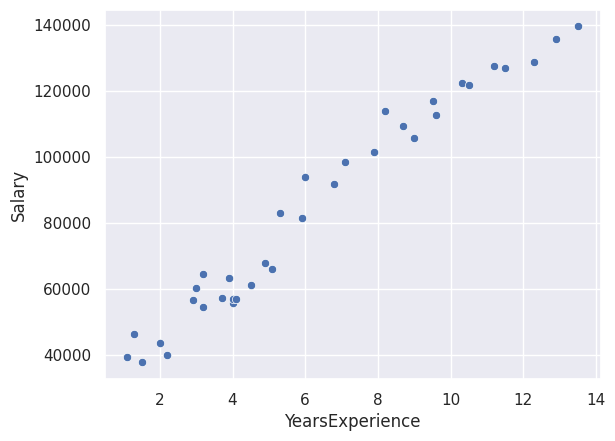

In [8]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
import statsmodels.api as sm
X = sm.add_constant(df['YearsExperience'])
y=df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size=0.20, random_state=100)

In [24]:
print(X.shape)
print(y.shape)

(35, 2)
(35,)


In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 2)
(7, 2)
(28,)
(7,)


In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True)
sal_lm = lm.fit(X_train,y_train)

In [29]:
print("The coefficient for our mode is :{}".format(lm.coef_))

The coefficient for our mode is :[   0.         9196.97116547]


In [30]:
lm.intercept_

26549.28444230598

In [31]:
y_pred_test = sal_lm.predict(X_test)
y_pred_train = sal_lm.predict(X_train)

accuracy of prediction with r2_score. The r2_score will show here how well the data fit the regression model. Near to 1 is always a good model.

In [32]:
np.abs(r2_score(y_test, y_pred_test))

0.9631138568382936

We now check the mean squared error. The Mean Squared Error or MSE shows the closeness of regression line with the data points. Mean square error is calculated with the average of errors squared from data as it is relating to a function.

In [33]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

5869.045805308742